In [36]:
#GRIR Model on Python: Hasan Rafiq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pickle
from sklearn.externals import joblib

In [2]:
df = pd.read_csv('GRIR_GCP_Data.csv',low_memory=False)

In [5]:
df.tail(5)

,WERKS,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,EKGRP,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
8274,ML03,2,2,1,90,2,C,151,142,78,60,9,966,1
8275,ML03,2,2,1,90,2,C,80,78,146,125,2,1237,1
8276,ML03,2,2,1,90,2,C,89,82,174,149,7,3967,0
8277,ML03,2,2,1,90,2,C,167,160,200,179,7,3660,0
8278,ML03,2,2,1,90,2,C,82,81,123,100,1,212,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 14 columns):
WERKS       8279 non-null object
SCENARIO    8279 non-null int64
KTOKK       8279 non-null int64
VSTATU      8279 non-null int64
VPATD       8279 non-null int64
EKORG       8279 non-null int64
EKGRP       8279 non-null object
TOTGRQTY    8279 non-null int64
TOTIRQTY    8279 non-null int64
NODLGR      8279 non-null int64
NODLIR      8279 non-null int64
DIFGRIRD    8279 non-null int64
DIFGRIRV    8279 non-null int64
STATUS      8279 non-null int64
dtypes: int64(12), object(2)
memory usage: 905.6+ KB


In [7]:
df.describe()

,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
count,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000
mean,2.565286,1.497886,1.119097,60.264525,1.333374,65.938398,94.098563,103.070419,89.499819,-28.160164,-6716.334461,0.391835
std,1.096595,0.500026,0.323922,24.387448,0.471447,62.960829,62.449709,81.968329,75.005213,63.224655,22797.380084,0.488190
min,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,-75000.000000,0.000000
25%,2.000000,1.000000,1.000000,30.000000,1.000000,0.000000,54.000000,0.000000,10.000000,-56.000000,-9600.000000,0.000000
50%,3.000000,1.000000,1.000000,60.000000,1.000000,55.000000,99.000000,112.000000,82.000000,-2.000000,-546.000000,0.000000
75%,4.000000,2.000000,1.000000,90.000000,2.000000,121.000000,146.000000,172.000000,154.000000,11.000000,5482.000000,1.000000
max,4.000000,2.000000,2.000000,90.000000,2.000000,200.000000,200.000000,268.000000,242.000000,74.000000,59200.000000,1.000000


In [8]:
#Pandas dataset copied
df_temp = df

#Mark some columns as categorical
for col_cat in ['SCENARIO','KTOKK','VSTATU','EKORG']:
    df_temp[col_cat] = df_temp[col_cat].astype('category')

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 14 columns):
WERKS       8279 non-null object
SCENARIO    8279 non-null category
KTOKK       8279 non-null category
VSTATU      8279 non-null category
VPATD       8279 non-null int64
EKORG       8279 non-null category
EKGRP       8279 non-null object
TOTGRQTY    8279 non-null int64
TOTIRQTY    8279 non-null int64
NODLGR      8279 non-null int64
NODLIR      8279 non-null int64
DIFGRIRD    8279 non-null int64
DIFGRIRV    8279 non-null int64
STATUS      8279 non-null int64
dtypes: category(4), int64(8), object(2)
memory usage: 679.7+ KB


In [9]:
#Categorical columns to one hot -> Not used for correlation
df_temp = pd.get_dummies(df_temp)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 24 columns):
VPATD         8279 non-null int64
TOTGRQTY      8279 non-null int64
TOTIRQTY      8279 non-null int64
NODLGR        8279 non-null int64
NODLIR        8279 non-null int64
DIFGRIRD      8279 non-null int64
DIFGRIRV      8279 non-null int64
STATUS        8279 non-null int64
WERKS_ML01    8279 non-null uint8
WERKS_ML02    8279 non-null uint8
WERKS_ML03    8279 non-null uint8
SCENARIO_1    8279 non-null uint8
SCENARIO_2    8279 non-null uint8
SCENARIO_3    8279 non-null uint8
SCENARIO_4    8279 non-null uint8
KTOKK_1       8279 non-null uint8
KTOKK_2       8279 non-null uint8
VSTATU_1      8279 non-null uint8
VSTATU_2      8279 non-null uint8
EKORG_1       8279 non-null uint8
EKORG_2       8279 non-null uint8
EKGRP_A       8279 non-null uint8
EKGRP_B       8279 non-null uint8
EKGRP_C       8279 non-null uint8
dtypes: int64(8), uint8(16)
memory usage: 646.9 KB


In [10]:
df_temp.head()

,VPATD,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS,WERKS_ML01,WERKS_ML02,...,SCENARIO_4,KTOKK_1,KTOKK_2,VSTATU_1,VSTATU_2,EKORG_1,EKORG_2,EKGRP_A,EKGRP_B,EKGRP_C
0,30,0,80,0,90,-80,-38100,1,1,0,...,0,1,0,1,0,1,0,1,0,0
1,30,0,107,0,177,-107,-41600,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,30,0,107,0,152,-107,-27600,1,1,0,...,0,1,0,1,0,1,0,1,0,0
3,30,0,96,0,79,-96,-13800,1,1,0,...,0,1,0,1,0,1,0,1,0,0
4,30,0,146,0,192,-146,-73500,0,1,0,...,0,1,0,1,0,1,0,1,0,0


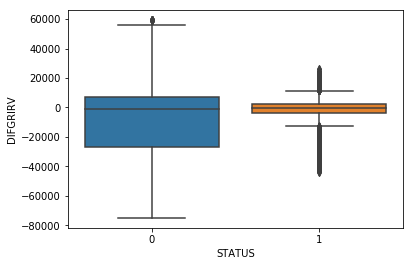

In [22]:
#Corr 1 : Making a box plot for DIFGRIRV column
sns.boxplot(x="STATUS", y="DIFGRIRV", data=df_temp)
plt.show()

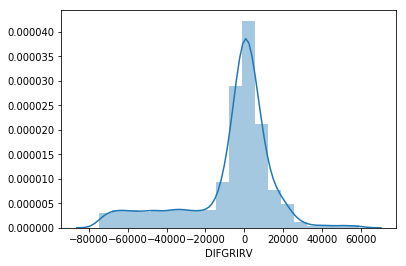

In [28]:
#Distribution 1 
sns.distplot(df_temp["DIFGRIRV"],bins=20)
plt.show()

In [30]:
#Prepare train and output columns
df_train_x = df_temp.drop(['STATUS'],axis=1)
df_train_y = df_temp['STATUS']

#Convert dataset to numpy
np_x = df_train_x.values
np_y = df_train_y.values

#Print input signature
#df_train_x.info()
print(np_x.shape)
print(np_y.shape)

(8279, 23)
(8279,)


In [41]:
#Run random forest Algorithm

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.1, random_state=1, stratify=np_y)

In [42]:
#Create model
#mod = RandomForestClassifier(n_estimators = 1000, max_depth=1000,oob_score=True,n_jobs=-1,verbose=1)
mod = GradientBoostingClassifier(n_estimators= 200,max_depth=1000,learning_rate = 0.01,verbose=1)

#Random forest Run Training
mod.fit(X_train,y_train)
print("Train accuracy:", mod.score(X_train,y_train))
print("Test accuracy:", mod.score(X_test,y_test))

#Save model on file
mod_file = pickle.dumps(mod)
joblib.dump(mod_file, 'grir_model.pkl') 

      Iter       Train Loss   Remaining Time 
         1           1.3193           15.56s
         2           1.2998           12.26s
         3           1.2808           11.06s
         4           1.2621           11.62s
         5           1.2438           11.63s
         6           1.2260           11.20s
         7           1.2084           11.49s
         8           1.1913           11.77s
         9           1.1745           11.50s
        10           1.1580           11.24s
        20           1.0092           12.64s
        30           0.8849           13.03s
        40           0.7795           11.43s
        50           0.6893            9.90s
        60           0.6113            8.81s
        70           0.5436            7.84s
        80           0.4844            7.11s
        90           0.4325            6.32s
       100           0.3867            5.62s
       200           0.1331            0.00s
Train accuracy: 1.0
Test accuracy: 0.9758454106280193


['grir_model.pkl']

In [43]:
#Get variable contributions
i = 0
train_cols = df_train_x.columns
influ = {}
infl_list = []
for f in mod.feature_importances_:
    influ = {}
    influ['attribute'] = train_cols[i]
    influ['contribution'] = f * 100
    infl_list.append(influ)
    i = i+1
    
pd_infl = pd.DataFrame(infl_list)
pd_infl["contribution"].astype('float')
pd_infl = pd_infl.sort_values("contribution",ascending=False)
print(pd_infl)

     attribute  contribution
6     DIFGRIRV     35.620853
4       NODLIR     12.668420
3       NODLGR      8.418021
5     DIFGRIRD      6.265458
16    VSTATU_1      6.102409
17    VSTATU_2      5.204924
0        VPATD      4.896526
18     EKORG_1      4.690273
1     TOTGRQTY      3.316542
19     EKORG_2      2.648217
13  SCENARIO_4      2.615481
9   WERKS_ML03      2.399024
2     TOTIRQTY      2.043684
15     KTOKK_2      0.695362
14     KTOKK_1      0.677983
12  SCENARIO_3      0.622234
10  SCENARIO_1      0.391601
21     EKGRP_B      0.192763
22     EKGRP_C      0.141422
11  SCENARIO_2      0.131946
20     EKGRP_A      0.113497
7   WERKS_ML01      0.093801
8   WERKS_ML02      0.049559
